In [2]:
from utils import *
from external_packages import *

In [10]:
scalers=['MinMaxScaler','MaxAbsScaler','StandardScaler','RobustScaler','QuantileTransformer','PowerTransformer']
scaledData=dict()
train_test_splits=[]
for scaler in scalers:
    
    final_stackset=pd.read_csv(processed_data_folder+'/final_stackset_'+str(scaler)+'.csv',index_col=0)
    final_stackset_features=final_stackset.drop(['ID','to_predict'],axis=1)
    final_stackset_target=final_stackset.loc[:,['to_predict']]
    final_stackset_target.groupby('to_predict')['to_predict'].count()
    X_train, X_test, y_train, y_test=train_test_split(final_stackset_features,final_stackset_target,
                            test_size=0.2,stratify=final_stackset_target,random_state =random_state )
    train_test_splits.append([X_train, y_train, X_test,y_test])

In [11]:
pca_results=[]
pca = PCA()
for [X_train, X_test, y_train, y_test] in train_test_splits: 
    pca = PCA()
    pca.fit(X_train)
    predicted=pca.transform(X_train)
    pca_results.append(pca)

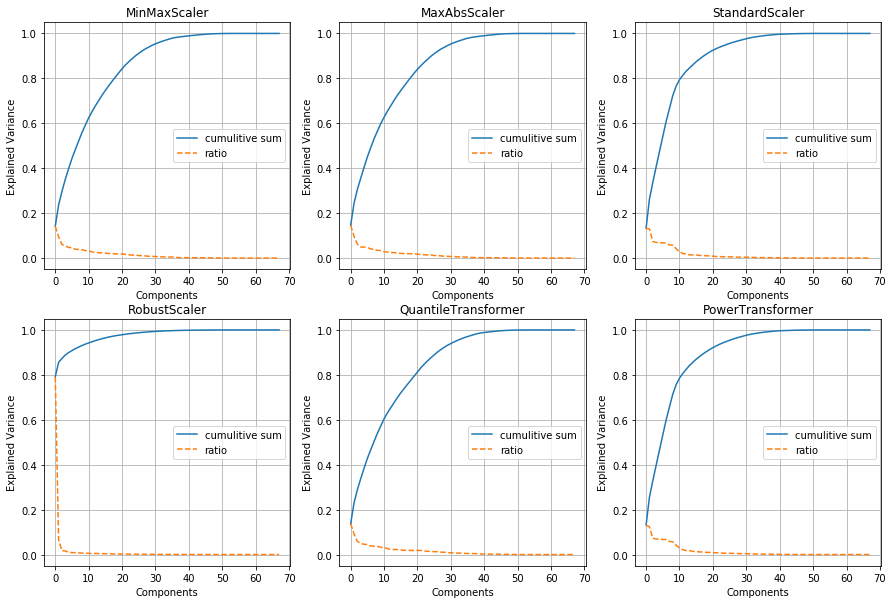

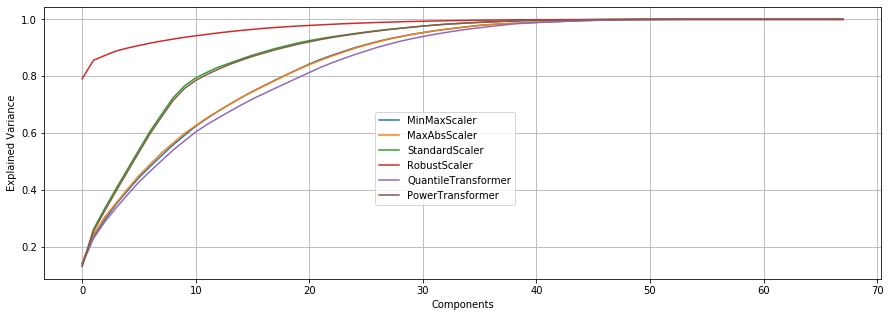

In [14]:
scree_plot(pca_results,figsize=(15,10),titles=scalers)

In [3]:
final_stackset=pd.read_csv(processed_data_folder+'/final_stackset_PowerTransformer.csv',index_col=0)
final_stackset_features=final_stackset.drop(['ID','to_predict'],axis=1)
final_stackset_target=final_stackset.loc[:,['to_predict']]
final_stackset_target.groupby('to_predict')['to_predict'].count()

to_predict
0    999756
1       244
Name: to_predict, dtype: int64

In [27]:
X_train, X_test, y_train, y_test=train_test_split(final_stackset_features,final_stackset_target,
                        test_size=0.2,stratify=final_stackset_target,random_state =random_state )

In [5]:
train_test_splits_pca=[]
for i in range(20,60,5):
    pca = PCA(n_components=i)
    X_train_pca=pca.fit_transform(X_train)
    X_test_pca=pca.transform(X_test)
    train_test_splits_pca.append([X_train_pca, y_train,X_test_pca, y_test])

In [8]:
modeling=experiment()
modeling.train_test_splits=train_test_splits_pca
LR=LogisticRegression(class_weight ='balanced',random_state=random_state)
modeling.run_model(LR,'LR'+str(i))

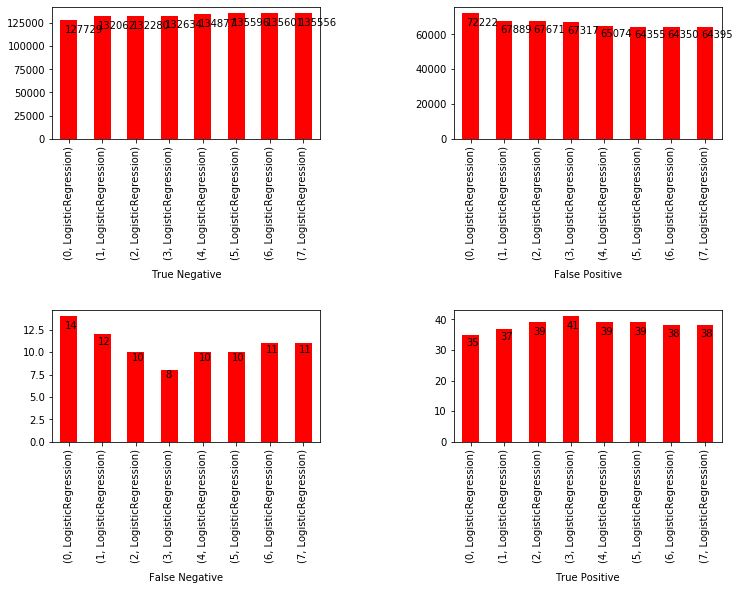

In [9]:
modeling.plot_comp(cmap_name='autumn',figsize=(12,8))

In [28]:
scoring={'MCC':metrics.make_scorer(metrics.matthews_corrcoef),
        'AUC_macro':metrics.make_scorer(metrics.roc_auc_score, average='macro'),
         'AUC_micro':metrics.make_scorer(metrics.roc_auc_score, average='micro'),
         'AUC_weighted':metrics.make_scorer(metrics.roc_auc_score, average='weighted'),
        'Precision_macro':metrics.make_scorer(metrics.precision_score, average='macro'),
        'Precision_micro':metrics.make_scorer(metrics.precision_score, average='micro'),
         'Precision_weighted':metrics.make_scorer(metrics.precision_score, average='weighted'),
        'F1_macro':metrics.make_scorer(metrics.f1_score, average='macro'),
        'F1_micro':metrics.make_scorer(metrics.f1_score, average='micro'),
        'F1_weighted':metrics.make_scorer(metrics.f1_score, average='weighted'),
        'Recall_macro':metrics.make_scorer(metrics.recall_score, average='macro'),
        'Recall_micro':metrics.make_scorer(metrics.recall_score, average='micro'),
        'Recall_weighted':metrics.make_scorer(metrics.recall_score, average='weighted'),
         'ZeroOne':metrics.make_scorer(metrics.zero_one_loss, normalize=True),
         'Cohen':metrics.make_scorer(metrics.cohen_kappa_score),
         'log_loss':metrics.make_scorer(metrics.log_loss),
         'Accuracy_balanced':metrics.make_scorer(metrics.balanced_accuracy_score),
        }


LR=LogisticRegression(class_weight ='balanced',random_state=random_state,solver='newton-cg',multi_class='multinomial')
pca = PCA(random_state=random_state)
pipe = Pipeline(steps=[('PCA', pca),('lr',LR)])
n_components=[i for i in range(35,60,5)]
param_grid = {
    'PCA__n_components':n_components,
}
gsc = GridSearchCV(pipe, param_grid, cv=5,scoring=scoring,verbose=10,refit='MCC')
grid_result=gsc.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] PCA__n_components=35 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  PCA__n_components=35, AUC_macro=0.562, AUC_micro=0.562, AUC_weighted=0.562, Accuracy_balanced=0.562, Cohen=0.000, F1_macro=0.408, F1_micro=0.688, F1_weighted=0.815, MCC=0.004, Precision_macro=0.500, Precision_micro=0.688, Precision_weighted=1.000, Recall_macro=0.562, Recall_micro=0.688, Recall_weighted=0.688, ZeroOne=0.312, log_loss=10.778, total=  41.0s
[CV] PCA__n_components=35 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.9s remaining:    0.0s


[CV]  PCA__n_components=35, AUC_macro=0.678, AUC_micro=0.678, AUC_weighted=0.678, Accuracy_balanced=0.678, Cohen=0.001, F1_macro=0.399, F1_micro=0.663, F1_weighted=0.797, MCC=0.012, Precision_macro=0.500, Precision_micro=0.663, Precision_weighted=1.000, Recall_macro=0.678, Recall_micro=0.663, Recall_weighted=0.663, ZeroOne=0.337, log_loss=11.626, total=  28.0s
[CV] PCA__n_components=35 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  PCA__n_components=35, AUC_macro=0.667, AUC_micro=0.667, AUC_weighted=0.667, Accuracy_balanced=0.667, Cohen=0.000, F1_macro=0.401, F1_micro=0.668, F1_weighted=0.801, MCC=0.011, Precision_macro=0.500, Precision_micro=0.668, Precision_weighted=1.000, Recall_macro=0.667, Recall_micro=0.668, Recall_weighted=0.668, ZeroOne=0.332, log_loss=11.458, total=  28.7s
[CV] PCA__n_components=35 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min remaining:    0.0s


[CV]  PCA__n_components=35, AUC_macro=0.602, AUC_micro=0.602, AUC_weighted=0.602, Accuracy_balanced=0.602, Cohen=0.000, F1_macro=0.400, F1_micro=0.665, F1_weighted=0.799, MCC=0.007, Precision_macro=0.500, Precision_micro=0.665, Precision_weighted=1.000, Recall_macro=0.602, Recall_micro=0.665, Recall_weighted=0.665, ZeroOne=0.335, log_loss=11.571, total= 1.3min
[CV] PCA__n_components=35 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.9min remaining:    0.0s


[CV]  PCA__n_components=35, AUC_macro=0.601, AUC_micro=0.601, AUC_weighted=0.601, Accuracy_balanced=0.601, Cohen=0.000, F1_macro=0.399, F1_micro=0.663, F1_weighted=0.797, MCC=0.007, Precision_macro=0.500, Precision_micro=0.663, Precision_weighted=1.000, Recall_macro=0.601, Recall_micro=0.663, Recall_weighted=0.663, ZeroOne=0.337, log_loss=11.637, total=  50.8s
[CV] PCA__n_components=40 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.8min remaining:    0.0s


[CV]  PCA__n_components=40, AUC_macro=0.604, AUC_micro=0.604, AUC_weighted=0.604, Accuracy_balanced=0.604, Cohen=0.000, F1_macro=0.411, F1_micro=0.695, F1_weighted=0.820, MCC=0.007, Precision_macro=0.500, Precision_micro=0.695, Precision_weighted=1.000, Recall_macro=0.604, Recall_micro=0.695, Recall_weighted=0.695, ZeroOne=0.305, log_loss=10.522, total=  56.9s
[CV] PCA__n_components=40 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.7min remaining:    0.0s


[CV]  PCA__n_components=40, AUC_macro=0.670, AUC_micro=0.670, AUC_weighted=0.670, Accuracy_balanced=0.670, Cohen=0.001, F1_macro=0.403, F1_micro=0.673, F1_weighted=0.804, MCC=0.011, Precision_macro=0.500, Precision_micro=0.673, Precision_weighted=1.000, Recall_macro=0.670, Recall_micro=0.673, Recall_weighted=0.673, ZeroOne=0.327, log_loss=11.289, total=  41.6s
[CV] PCA__n_components=40 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  5.4min remaining:    0.0s


[CV]  PCA__n_components=40, AUC_macro=0.637, AUC_micro=0.637, AUC_weighted=0.637, Accuracy_balanced=0.637, Cohen=0.000, F1_macro=0.407, F1_micro=0.685, F1_weighted=0.813, MCC=0.009, Precision_macro=0.500, Precision_micro=0.685, Precision_weighted=1.000, Recall_macro=0.637, Recall_micro=0.685, Recall_weighted=0.685, ZeroOne=0.315, log_loss=10.873, total=  43.4s
[CV] PCA__n_components=40 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  6.1min remaining:    0.0s


[CV]  PCA__n_components=40, AUC_macro=0.621, AUC_micro=0.621, AUC_weighted=0.621, Accuracy_balanced=0.621, Cohen=0.000, F1_macro=0.404, F1_micro=0.677, F1_weighted=0.807, MCC=0.008, Precision_macro=0.500, Precision_micro=0.677, Precision_weighted=1.000, Recall_macro=0.621, Recall_micro=0.677, Recall_weighted=0.677, ZeroOne=0.323, log_loss=11.155, total=  59.3s
[CV] PCA__n_components=40 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.1min remaining:    0.0s


[CV]  PCA__n_components=40, AUC_macro=0.594, AUC_micro=0.594, AUC_weighted=0.594, Accuracy_balanced=0.594, Cohen=0.000, F1_macro=0.403, F1_micro=0.674, F1_weighted=0.805, MCC=0.006, Precision_macro=0.500, Precision_micro=0.674, Precision_weighted=1.000, Recall_macro=0.594, Recall_micro=0.674, Recall_weighted=0.674, ZeroOne=0.326, log_loss=11.255, total=  40.8s
[CV] PCA__n_components=45 ............................................
[CV]  PCA__n_components=45, AUC_macro=0.607, AUC_micro=0.607, AUC_weighted=0.607, Accuracy_balanced=0.607, Cohen=0.000, F1_macro=0.412, F1_micro=0.700, F1_weighted=0.823, MCC=0.007, Precision_macro=0.500, Precision_micro=0.700, Precision_weighted=1.000, Recall_macro=0.607, Recall_micro=0.700, Recall_weighted=0.700, ZeroOne=0.300, log_loss=10.355, total= 1.6min
[CV] PCA__n_components=45 ............................................
[CV]  PCA__n_components=45, AUC_macro=0.657, AUC_micro=0.657, AUC_weighted=0.657, Accuracy_balanced=0.657, Cohen=0.000, F1_macro=0.4

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 34.6min finished


In [29]:
print(grid_result.best_params_)

{'PCA__n_components': 45}


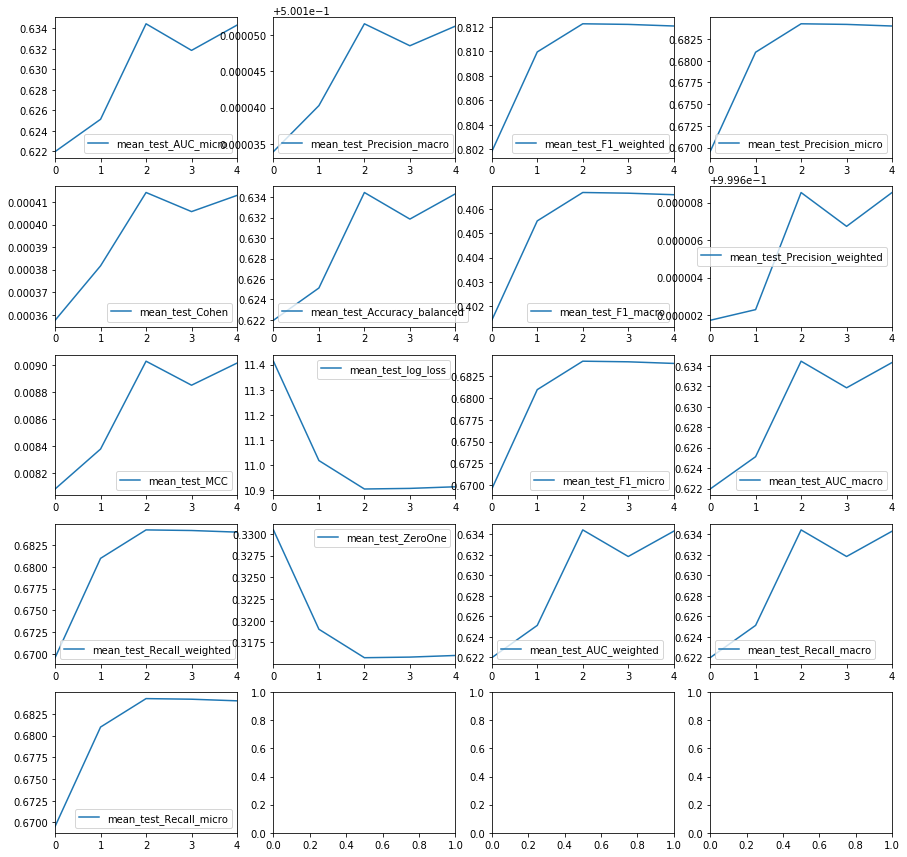

In [30]:
targets=list(set([item.split('mean_test_')[1] if 'mean_test' in item else '' for item in grid_result.cv_results_.keys()])-set(['']))
fig,axes=plt.subplots(math.ceil(len(targets)/4),4,figsize=(15,15))
axes=axes.ravel()
for i,item in enumerate(targets):
    pd.DataFrame({'mean_test_'+item:grid_result.cv_results_['mean_test_'+item]}).plot(ax=axes[i])

In [ ]:
pca = PCA(n_components=45)
pca.fit(X_train)
predicted=pca.transform(X_train)

In [40]:
principalDF=pd.DataFrame(pca.components_,columns=final_stackset_features.columns,
                        index=["PC"+str(i) for i,_ in enumerate(pca.components_)])

In [43]:
principalDF.head()

,alexa_ranking_ca,alexa_ranking_com,Visits,Year,Month,Day,Hour,Minute,USHoliday,CAHoliday,...,1024,125,2048,250,480,50,600,627,90,Other.1
PC0,-0.000000e+00,-5.551115e-17,-0.021723,0.075637,-0.060502,-0.146207,0.005336,0.002350,0.555475,0.637480,...,0.000018,0.000151,0.000083,0.010300,0.000594,-0.001401,0.001764,-0.000022,-0.004628,-0.006433
PC1,8.326673e-17,4.996004e-16,-0.115396,0.686630,-0.694667,0.132237,0.031301,0.001357,-0.056901,-0.087718,...,-0.000130,-0.000145,-0.000092,-0.008815,0.001572,0.013331,-0.003591,-0.000515,-0.018341,0.018099
PC2,-1.595946e-16,3.885781e-16,0.250948,-0.129124,0.012654,0.696649,0.189983,0.064920,-0.248845,-0.047841,...,0.000147,0.000096,0.000146,-0.026239,-0.000302,-0.008390,0.007617,0.001692,0.016621,0.009309
PC3,-2.775558e-16,4.440892e-16,-0.106226,-0.019914,0.009985,0.220897,-0.730275,-0.621720,-0.017670,0.012408,...,-0.000021,0.000110,0.000045,0.005899,0.000187,0.008728,-0.008561,-0.000734,-0.014930,0.008136
PC4,4.163336e-17,-5.551115e-16,0.071347,0.009908,-0.007232,-0.018207,0.065253,-0.048942,0.006540,0.001156,...,0.000040,-0.000059,0.000007,0.001974,-0.000098,-0.002174,0.000765,-0.000098,0.002788,-0.002544


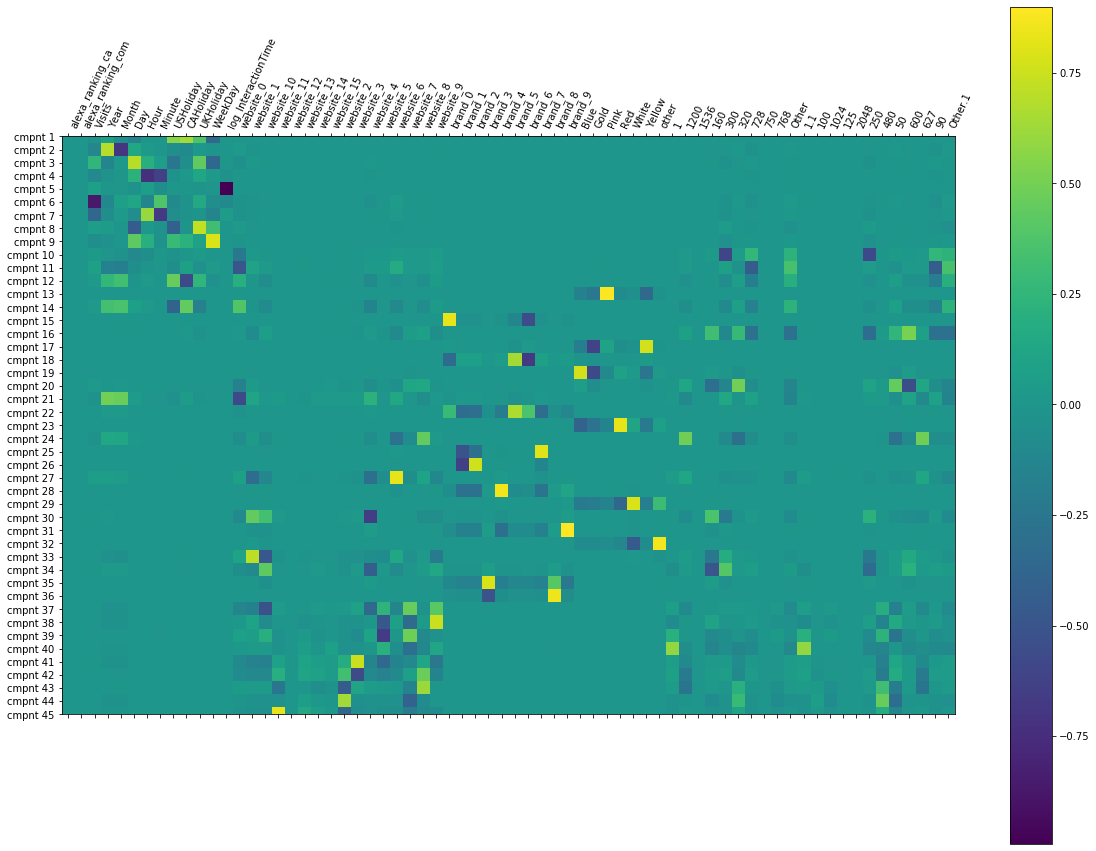

In [36]:
fig  = plt.figure(figsize=(20,15))
plt.matshow(pca.components_,cmap='viridis',fignum=1)
plt.yticks([i for i in range(len(pca.components_))],['cmpnt '+str(i+1) for i in range(len(pca.components_))],fontsize=10)
plt.colorbar()
plt.xticks(range(len(final_stackset_features.columns)),final_stackset_features.columns,rotation=65,ha='left')
plt.show()#

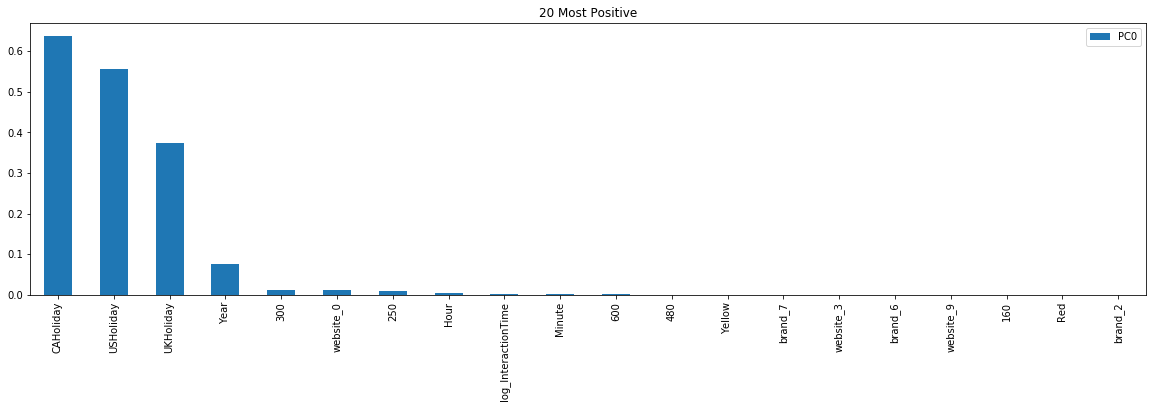

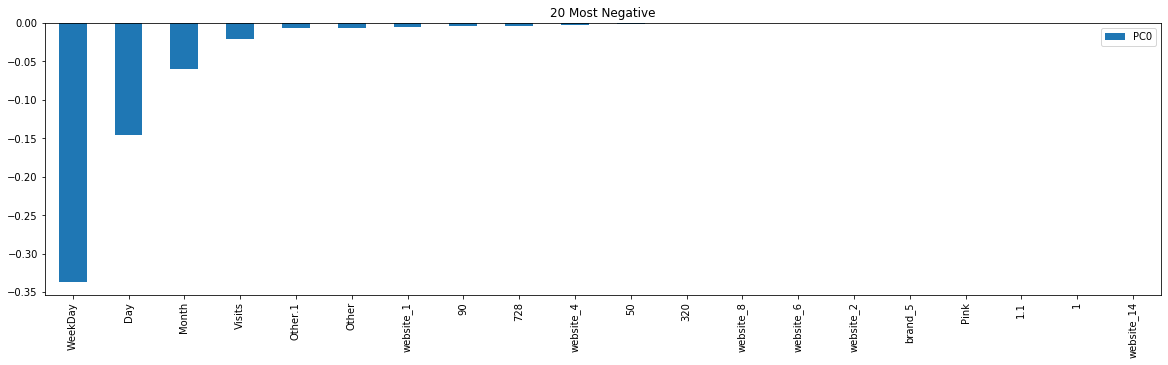

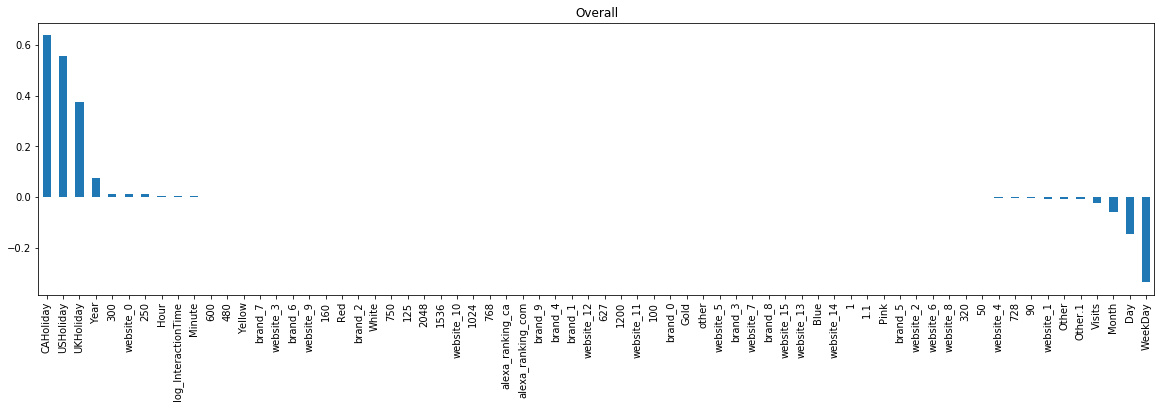

In [64]:
temp=get_sorted_pc(principalDF,0)

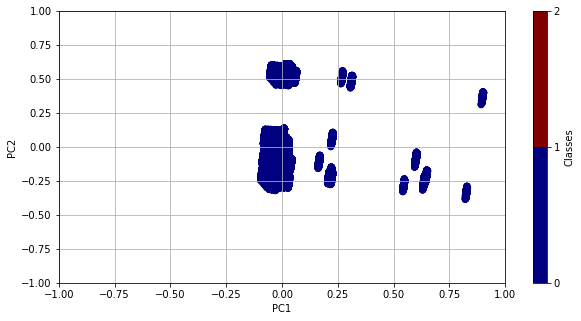

In [66]:
biplot(predicted,y_train,pca.components_,1,2,labels=[i for i in range(len(final_stackset_features.columns))])